Data pre-processing !!

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import torch
from torchvision import models,transforms
import torch.nn as nn
import torch.optim as optim
from PIL import Image
from pickle import dump
from torch.utils.data import Dataset,DataLoader
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
device = torch.device('cpu')
data = pd.read_csv("/content/data job posts.csv.zip")
data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18996,Technolinguistics NGO\r\n\r\n\r\nTITLE: Senio...,"Dec 28, 2015",Senior Creative UX/ UI Designer,Technolinguistics NGO,NaN,Full-time,NaN,NaN,NaN,Long-term,...,Competitive,"To apply for this position, please send your\r...",29 December 2015,28 January 2016,NaN,As a company Technolinguistics has a mandate t...,NaN,2015,12,False
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18999,San Lazzaro LLC\r\n\r\n\r\nTITLE: Head of O...,"Dec 30, 2015",Head of Online Sales Department,San Lazzaro LLC,NaN,NaN,NaN,NaN,NaN,Long-term,...,Highly competitive,Interested candidates can send their CVs to:\r...,30 December 2015,29 January 2016,NaN,San Lazzaro LLC works with several internation...,NaN,2015,12,False


In [3]:
data.RequiredQual

,RequiredQual
0,"To perform this job successfully, an\r\nindivi..."
1,- Bachelor's Degree; Master's is preferred;\r\...
2,"- Degree in environmentally related field, or ..."
3,"- Advanced degree in public health, social sci..."
4,- University degree; economical background is ...
...,...
18996,- At least 5 years of experience in Interface/...
18997,"- University degree, ideally business related;..."
18998,"- Degree in Business, Marketing or a related f..."
18999,- At least 1 year of experience in online sale...


In [4]:
data.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [5]:
data.JobDescription

,JobDescription
0,AMERIA Investment Consulting Company is seekin...
1,NaN
2,Public outreach and strengthening of a growing...
3,The LEAD (Local Enhancement and Development fo...
4,NaN
...,...
18996,A tech startup of Technolinguistics based in N...
18997,NaN
18998,NaN
18999,San Lazzaro LLC is looking for a well-experien...


In [6]:
data.JobRequirment

,JobRequirment
0,- Supervises financial management and administ...
1,NaN
2,- Working with the Country Director to provide...
3,- Identify gaps in knowledge and overseeing in...
4,- Rendering technical assistance to Database M...
...,...
18996,- Work closely with product and business teams...
18997,- Establish and manage Category Management dev...
18998,"- Develop, establish and maintain marketing st..."
18999,- Handle the project activites of the online s...


In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [14]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 jobpost                 0
date                    0
Title                  28
Company                 7
AnnouncementCode    17793
Term                11325
Eligibility         14071
Audience            18361
StartDate            9326
Duration             8203
Location               32
JobDescription       3892
JobRequirment        2522
RequiredQual          484
Salary               9379
ApplicationP           60
OpeningDate           706
Deadline               65
Notes               16790
AboutC               6531
Attach              17442
Year                    0
Month                   0
IT                      0
dtype: int64


In [8]:
df = data[["RequiredQual","JobDescription","JobRequirment","Title"]].dropna()
df

,RequiredQual,JobDescription,JobRequirment,Title
0,"To perform this job successfully, an\r\nindivi...",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,Chief Financial Officer
2,"- Degree in environmentally related field, or ...",Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,Country Coordinator
3,"- Advanced degree in public health, social sci...",The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,BCC Specialist
13,- Higher Education and/or professional experie...,Food Security Regional Cooperation and Stabili...,- Assist the Tavush Marz communities and commu...,"Community Development, Capacity Building and C..."
17,- Minimum Masters Degree in Economics;\r\n- Mi...,The United Nations Development Programme in Ar...,The incumbent under direct supervision of UNDP...,Country Economist (NOB)
...,...,...,...,...
18992,- 2 - 5 years of experience in software develo...,The incumbent will develop software applicatio...,- Participate in all the steps of the software...,.NET Developer
18995,"- University degree in Civil Engineering, Econ...",The incumbent will be responsible for supporti...,- Support the Director in organizing the activ...,Deputy Director
18996,- At least 5 years of experience in Interface/...,A tech startup of Technolinguistics based in N...,- Work closely with product and business teams...,Senior Creative UX/ UI Designer
18999,- At least 1 year of experience in online sale...,San Lazzaro LLC is looking for a well-experien...,- Handle the project activites of the online s...,Head of Online Sales Department


In [9]:
classes = df['Title'].value_counts()[:20]
keys = classes.keys().to_list()

df = df[df['Title'].isin(keys)]
df['Title'].value_counts()

,count
Title,
Accountant,216
Medical Representative,151
Chief Accountant,151
Sales Manager,126
Administrative Assistant,124
Lawyer,115
Project Manager,94
Software Developer,79
Web Developer,74


In [10]:
def chane_titles(x):
    x = x.strip()
    if x == 'Senior Java Developer':
        return 'Java Developer'
    elif x == 'Senior Software Engineer':
        return 'Software Engineer'
    elif x == 'Senior QA Engineer':
        return 'Software QA Engineer'
    elif x == 'Senior Software Developer':
        return 'Senior Web Developer'
    elif x =='Senior PHP Developer':
        return 'PHP Developer'
    elif x == 'Senior .NET Developer':
        return '.NET Developer'
    elif x == 'Senior Web Developer':
        return 'Web Developer'
    elif x == 'Database Administrator':
        return 'Database Admin/Dev'
    elif x == 'Database Developer':
        return 'Database Admin/Dev'

    else:
        return x


df['Title'] = df['Title'].apply(chane_titles)
df['Title'].value_counts()

<ipython-input-10-263ca1d685d6>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].apply(chane_titles)


,count
Title,
Accountant,216
Medical Representative,151
Chief Accountant,151
Java Developer,132
Sales Manager,126
Administrative Assistant,124
Lawyer,115
Project Manager,94
Software Developer,79


In [11]:
df["Combined"] = df.RequiredQual + df.JobDescription + df.JobRequirment
df.Combined = df.Combined.apply(lambda x: x.replace("\r\n"," "))
df

<ipython-input-11-f64f96f85e84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Combined"] = df.RequiredQual + df.JobDescription + df.JobRequirment
<ipython-input-11-f64f96f85e84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Combined = df.Combined.apply(lambda x: x.replace("\r\n"," "))


,RequiredQual,JobDescription,JobRequirment,Title,Combined
20,- Fluency in spoken and written English; knowl...,This is an excellent opportunity for the right...,- Responsible for managing office administrati...,Administrative Assistant,- Fluency in spoken and written English; knowl...
74,"- Written and oral fluency in English, Armenia...",The accountant is a full-time national staff p...,- Manage program financial system and budget o...,Accountant,"- Written and oral fluency in English, Armenia..."
77,- Excellent communication skills. Friendly per...,This is a full-time position based in CCDI's Y...,- Provide translation and interpretation servi...,Administrative Assistant,- Excellent communication skills. Friendly per...
82,- Experience in working with international org...,World Vision Armenia announces a full-time pos...,- Provide daily administrative and technical s...,Project Assistant,- Experience in working with international org...
91,"- University degree in humanitarian sciences, ...",The UNDP and the Ministry of Health seek\r\npr...,- Assist the Project Coordinator in the manage...,Project Assistant,"- University degree in humanitarian sciences, ..."
...,...,...,...,...,...
18970,- At least 2 years of experience in quality as...,BigBek is looking for a highly energetic and\r...,- Define test pans and test cases based on sof...,QA Engineer,- At least 2 years of experience in quality as...
18971,- Excellent communication skills;\r\n- Good or...,The incumbent will work under the direct super...,"- Answer telephone calls and inquiries, forwar...",Receptionist/ Administrative Assistant,- Excellent communication skills; - Good oral ...
18979,"- Higher education diploma in Economics, Engin...",Care Building Services LLC is seeking a Projec...,"- Prepare project documents, paperwork and rep...",Project Assistant,"- Higher education diploma in Economics, Engin..."
18985,- University degree;\r\n- At least 1 year of e...,Under the guidance and supervision of the Head...,The job responsibilities of the Project Assist...,Project Assistant,- University degree; - At least 1 year of expe...


In [15]:
df.iloc[0,4]

'- Fluency in spoken and written English; knowledge of other European languages will be desirable; - Wide-ranging administrative skills (knowledge of accounting/bookkeeping work, knowledge of tax, social security and accounting maters as per the British law, IT skills, etc); - Ability to prioritise competing tasks, even under pressure, in a methodical and systematic manner; - Experience in working using her/his own initiative as well as working in a team; - Excellent inter-personal and communication skills; - Excellent organising skills, including event organisation; - An international outlook and interest in developmental issues; - Comfortable in dealing with high-level dignitaries and working in an international environment.  REMUNERATION:  18,000 per annum.This is an excellent opportunity for the right person to join CUTS Centre for International Trade, Economics and Environment, London. CUTS (Consumer Unity & Trust Society) is a charitable organisation, with its headquarters in Jai

In [16]:
df.to_csv("Modified.csv",index=False)

In [19]:
class Vocabulary(object):
    """Simple vocabulary wrapper."""
    def __init__(self):
        self.word2idx = {}
        self.idx2word = {}
        self.idx = 0

    def add_word(self, word):
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            self.idx += 1

    def __call__(self, word):
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

In [20]:
def build_vocab(df, threshold=3):
    """Build a simple vocabulary wrapper."""
    counter = Counter()

    for i in range(len(df)):
        caption = df.iloc[i,4]
        tokens = nltk.tokenize.word_tokenize(str(caption))
        counter.update(tokens)

        if (i+1) % 1000 == 0:
                print("[{}/{}] Tokenized the sentences.".format(i+1, len(df)))

    # If the word frequency is less than 'threshold', then the word is discarded.
    words = [word for word, cnt in counter.items() if cnt >= threshold]

    # Create a vocab wrapper and add some special tokens.
    vocab = Vocabulary()
    vocab.add_word('<pad>')
    vocab.add_word('<start>')
    vocab.add_word('<end>')
    vocab.add_word('<unk>')

    # Add the words to the vocabulary.
    for i, word in enumerate(words):
        vocab.add_word(word)
    return vocab

In [22]:
import nltk
nltk.download('punkt')
v = build_vocab(df)
dump(v, open('vocab.pkl', 'wb'))
len(v)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[1000/1773] Tokenized the sentences.


5222

In [23]:
le = LabelEncoder()
df["TitleUse"] = le.fit_transform(df.Title)
df

<ipython-input-23-026b19d3c592>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TitleUse"] = le.fit_transform(df.Title)


,RequiredQual,JobDescription,JobRequirment,Title,Combined,TitleUse
20,- Fluency in spoken and written English; knowl...,This is an excellent opportunity for the right...,- Responsible for managing office administrati...,Administrative Assistant,- Fluency in spoken and written English; knowl...,1
74,"- Written and oral fluency in English, Armenia...",The accountant is a full-time national staff p...,- Manage program financial system and budget o...,Accountant,"- Written and oral fluency in English, Armenia...",0
77,- Excellent communication skills. Friendly per...,This is a full-time position based in CCDI's Y...,- Provide translation and interpretation servi...,Administrative Assistant,- Excellent communication skills. Friendly per...,1
82,- Experience in working with international org...,World Vision Armenia announces a full-time pos...,- Provide daily administrative and technical s...,Project Assistant,- Experience in working with international org...,11
91,"- University degree in humanitarian sciences, ...",The UNDP and the Ministry of Health seek\r\npr...,- Assist the Project Coordinator in the manage...,Project Assistant,"- University degree in humanitarian sciences, ...",11
...,...,...,...,...,...,...
18970,- At least 2 years of experience in quality as...,BigBek is looking for a highly energetic and\r...,- Define test pans and test cases based on sof...,QA Engineer,- At least 2 years of experience in quality as...,13
18971,- Excellent communication skills;\r\n- Good or...,The incumbent will work under the direct super...,"- Answer telephone calls and inquiries, forwar...",Receptionist/ Administrative Assistant,- Excellent communication skills; - Good oral ...,14
18979,"- Higher education diploma in Economics, Engin...",Care Building Services LLC is seeking a Projec...,"- Prepare project documents, paperwork and rep...",Project Assistant,"- Higher education diploma in Economics, Engin...",11
18985,- University degree;\r\n- At least 1 year of e...,Under the guidance and supervision of the Head...,The job responsibilities of the Project Assist...,Project Assistant,- University degree; - At least 1 year of expe...,11


In [24]:
df.iloc[:,5].nunique()

19

In [25]:
x = torch.Tensor(np.array(df.iloc[:,5]))
x

tensor([ 1.,  0.,  1.,  ..., 11., 11.,  4.])

In [26]:
class Data(Dataset):
    def __init__(self,df,vocab):
        self.df = df
        self.vocab = vocab

    def __len__(self):
        return len(self.df)

    def __getitem__(self,idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        tokens = nltk.tokenize.word_tokenize(str(df.iloc[idx,4]))
        caption = []
        caption.append(self.vocab('<start>'))
        caption.extend([self.vocab(token) for token in tokens])
        caption.append(self.vocab('<end>'))
        return caption,x[idx]

def collate_fn(data):
    data.sort(key=lambda x: len(x[0]), reverse=True)
    captions,labels = zip(*data)
    lengths = [len(cap) for cap in captions]
    targets = torch.zeros(len(captions), max(lengths)).long()
    for i, cap in enumerate(captions):
        end = lengths[i]
        targets[i, :end] = torch.Tensor(cap[:end])
    return targets.to(device), labels

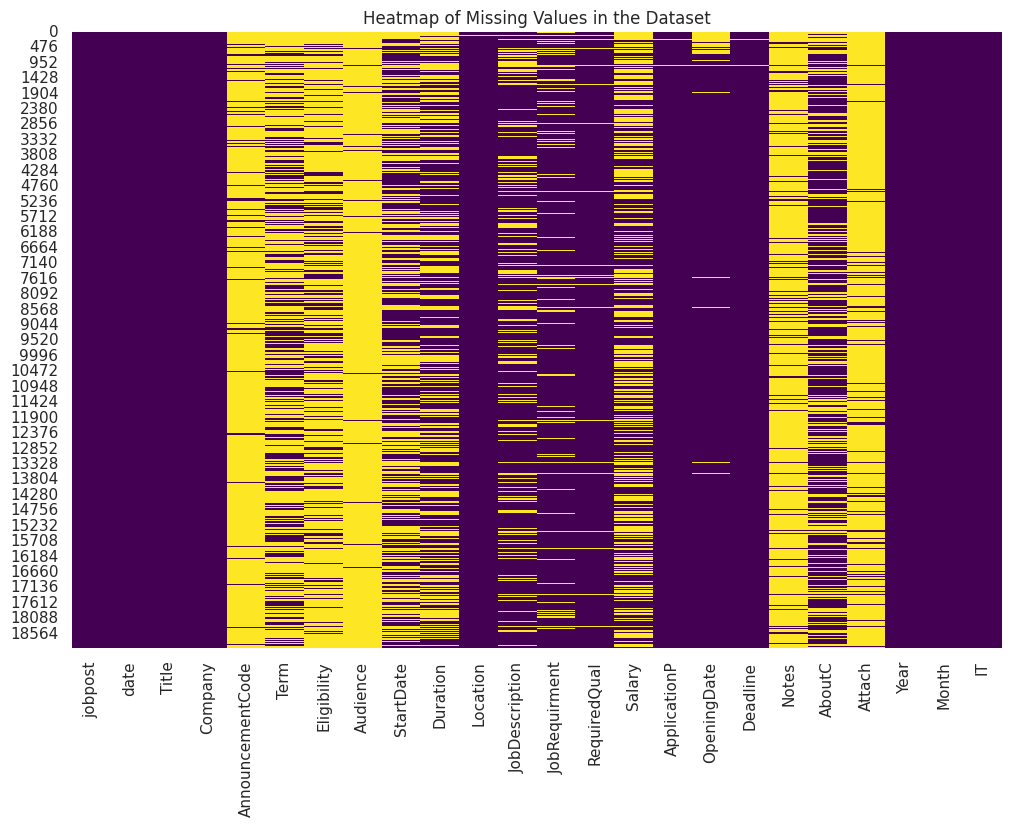

In [28]:
# Visualize missing values as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values in the Dataset")
plt.show()

<ipython-input-29-c7499ef8aa0e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='Title', order=data['Title'].value_counts().index[:10], palette="Blues_r")


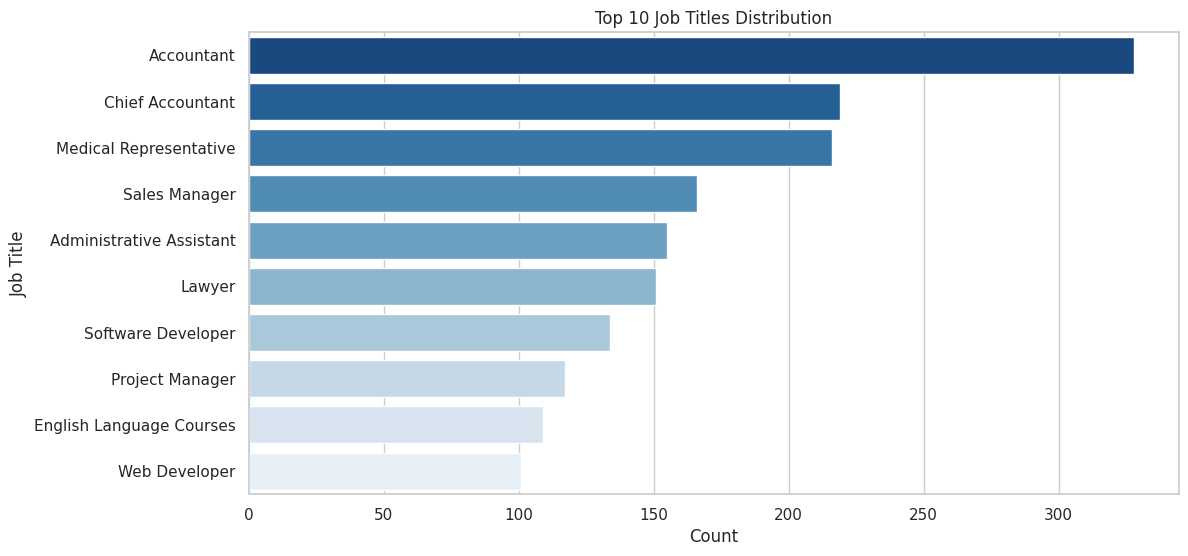

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Title', order=data['Title'].value_counts().index[:10], palette="Blues_r")
plt.title("Top 10 Job Titles Distribution")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.show()

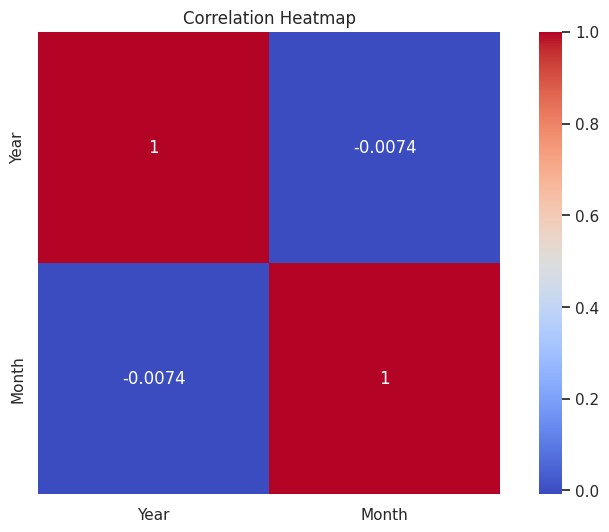

In [35]:
# Correlation Heatmap (for numeric columns)
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns

# Check if there are any numeric columns to plot
if not numeric_data.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", square=True)
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("No numeric columns available for correlation heatmap.")

# Analyze Top Skills (if there's a 'skills' column)
if 'skills' in data.columns:
    skills = data['skills'].str.split(',').dropna()
    all_skills = [skill.strip() for sublist in skills for skill in sublist]
    skills_count = pd.Series(all_skills).value_counts().head(10)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=skills_count.values, y=skills_count.index, palette="magma")
    plt.title("Top 10 Most Common Skills")
    plt.xlabel("Count")
    plt.ylabel("Skill")
    plt.show()

In [27]:
X_train,X_test,y_train,y_test = train_test_split(df.Combined,df.Title,test_size = 0.15,random_state = 0)
train = Data(pd.DataFrame(X_train),v)
test = Data(pd.DataFrame(X_test),v)
dataloaderTrain = DataLoader(train,4,num_workers=0,collate_fn=collate_fn)
dataloaderTest = DataLoader(test,4,num_workers=0,collate_fn=collate_fn)

In [36]:
for i,j in dataloaderTrain:
    print(i)
    print(j)
    print(i.shape,torch.stack(j).shape)
    break

tensor([[  1,   4, 173,  ..., 305,  72,   2],
        [  1,   4,  54,  ...,   0,   0,   0],
        [  1,   4,   5,  ...,   0,   0,   0],
        [  1,   4,  47,  ...,   0,   0,   0]])
(tensor(0.), tensor(1.), tensor(1.), tensor(11.))
torch.Size([4, 737]) torch.Size([4])


In [37]:
class Model(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers):
        super(Model, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True,bidirectional = True, dropout= 0.3)
        self.relu = nn.ReLU()
        self.linear = nn.Linear(hidden_size*2,256)
        self.linear3 = nn.Linear(256,19)

    def forward(self,captions):
        embeddings = self.embed(captions)
        hiddens, _ = self.lstm(embeddings)
        x = self.relu(self.linear(hiddens[:,-1,:]))
        outputs = self.linear3(x)
        return outputs

In [49]:
from torch.nn.utils.rnn import pack_padded_sequence
def train(model,data_loader,data_loaderTest,learning_rate,num_epochs):

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    total_step = len(data_loader)
    print("Total steps are: ", total_step)
    for epoch in range(num_epochs):
        running_loss = 0.0
        model.train()
        for i,(captions, lengths) in enumerate(data_loader):
            # Set mini-batch dataset
            captions = captions.to(device)
            # Forward, backward and optimize
            outputs = model(captions)
            loss = criterion(outputs.to(device),torch.stack(lengths).type(torch.LongTensor).to(device))
            model.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            if i % 50 == 0:
                print('Epoch [{}/{}], Step [{}/{}],Training Loss: {:.4f}'
                    .format(epoch, num_epochs, i, total_step, loss.item()))
        correct = 0
        total = 0
        model.eval()
        with torch.no_grad():
            for data in data_loader:
                captions, labels = data
                outputs = model(captions)
                _, predicted = torch.max(outputs.data, 1)
                total += torch.stack(labels).type(torch.LongTensor).size(0)
                correct += (predicted == torch.stack(labels).type(torch.LongTensor).to(device)).sum().item()
        print("Loss after epoch {} is {} and Accuracy is {}".format(epoch,running_loss/total_step,100 * correct / total))
        torch.save(model.state_dict(),"epoch"+str(epoch)+".pb")

        correct = 0
        total = 0
        with torch.no_grad():
            for data in data_loaderTest:
                captions, labels = data
                outputs = model(captions)
                _, predicted = torch.max(outputs.data, 1)
                total += torch.stack(labels).type(torch.LongTensor).size(0)
                correct += (predicted == torch.stack(labels).type(torch.LongTensor).to(device)).sum().item()
        print("Loss after epoch {} is {} and Accuracy is {}".format(epoch,running_loss,100 * correct / total))

In [50]:
model = Model(1024,512,len(v),3).to(device)

# Training

In [51]:
train(model,dataloaderTrain,dataloaderTest,0.001,5)

Total steps are:  377
Epoch [0/5], Step [0/377],Training Loss: 2.9563
Epoch [0/5], Step [50/377],Training Loss: 3.0279
Epoch [0/5], Step [100/377],Training Loss: 2.8788
Epoch [0/5], Step [150/377],Training Loss: 2.5883
Epoch [0/5], Step [200/377],Training Loss: 3.6786
Epoch [0/5], Step [250/377],Training Loss: 2.8434
Epoch [0/5], Step [300/377],Training Loss: 2.7013
Epoch [0/5], Step [350/377],Training Loss: 2.8606
Loss after epoch 0 is 2.7905553443362288 and Accuracy is 10.28533510285335
Loss after epoch 0 is 1052.0393648147583 and Accuracy is 4.135338345864661
Epoch [1/5], Step [0/377],Training Loss: 3.0597
Epoch [1/5], Step [50/377],Training Loss: 3.1129
Epoch [1/5], Step [100/377],Training Loss: 2.6798
Epoch [1/5], Step [150/377],Training Loss: 2.4473
Epoch [1/5], Step [200/377],Training Loss: 3.6152
Epoch [1/5], Step [250/377],Training Loss: 2.9005
Epoch [1/5], Step [300/377],Training Loss: 2.6724
Epoch [1/5], Step [350/377],Training Loss: 2.8059
Loss after epoch 1 is 2.7581825986

<h1>Best overall accuracy at epoch 43 </h1>
<h1>training = 99.73457199734572% , testing = 99.62406015037594% </h1>


<h1>Best testing accuracy at epoch 29 </h1>
<h1>training = 98.4737889847379% , testing = 100.0% </h1>

In [52]:
torch.save(model.state_dict(), "epoch8.pb")
torch.save(model.state_dict(), "epoch8.pb")